# Lab 1

Dmytro Geleshko

IP-91

## Imports

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Config

In [84]:
pd.options.display.float_format ="{:,.3f}".format

# Data

## Load
Loading data as DataFrame using pandas

In [85]:
df = pd.read_csv("../Data/water_potability.csv", dtype=np.float32)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890,"20,791.318",7.300,368.516,564.309,10.380,86.991,2.963,0.000
1,3.716,129.423,"18,630.059",6.635,NaN,592.885,15.180,56.329,4.501,0.000
2,8.099,224.236,"19,909.541",9.276,NaN,418.606,16.869,66.420,3.056,0.000
3,8.317,214.373,"22,018.418",8.059,356.886,363.267,18.437,100.342,4.629,0.000
4,9.092,181.102,"17,978.986",6.547,310.136,398.411,11.558,31.998,4.075,0.000
...,...,...,...,...,...,...,...,...,...,...
3271,4.668,193.682,"47,580.992",7.167,359.949,526.424,13.894,66.688,4.436,1.000
3272,7.809,193.553,"17,329.803",8.061,NaN,392.450,19.903,NaN,2.798,1.000
3273,9.420,175.763,"33,155.578",7.350,NaN,432.045,11.039,69.845,3.299,1.000
3274,5.127,230.604,"11,983.869",6.303,NaN,402.883,11.169,77.488,4.709,1.000


## Drop Target
Drop target column, used for classification

In [86]:
y = df.pop("Potability")

## Info
Get some info about data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float32
 1   Hardness         3276 non-null   float32
 2   Solids           3276 non-null   float32
 3   Chloramines      3276 non-null   float32
 4   Sulfate          2495 non-null   float32
 5   Conductivity     3276 non-null   float32
 6   Organic_carbon   3276 non-null   float32
 7   Trihalomethanes  3114 non-null   float32
 8   Turbidity        3276 non-null   float32
dtypes: float32(9)
memory usage: 115.3 KB


## Drop NaN
Drop rows where at least one column contains Nan

In [88]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float32
 1   Hardness         2011 non-null   float32
 2   Solids           2011 non-null   float32
 3   Chloramines      2011 non-null   float32
 4   Sulfate          2011 non-null   float32
 5   Conductivity     2011 non-null   float32
 6   Organic_carbon   2011 non-null   float32
 7   Trihalomethanes  2011 non-null   float32
 8   Turbidity        2011 non-null   float32
dtypes: float32(9)
memory usage: 86.4 KB


## Stats
Get stats about our data

In [89]:
df_stats = df.describe().T
df_stats["var"] = np.square(df_stats["std"].values)
df_stats["mode"] = df.round(2).mode().iloc[0]
df_stats

,count,mean,std,min,25%,50%,75%,max,var,mode
ph,"2,011.000",7.086,1.573,0.227,6.090,7.027,8.053,14.000,2.475,7.370
Hardness,"2,011.000",195.968,32.635,73.492,176.745,197.192,216.441,317.338,"1,065.049",208.910
Solids,"2,011.000","21,917.439","8,642.240",320.943,"15,615.665","20,933.514","27,182.588","56,488.672","74,688,316.269","13,742.140"
Chloramines,"2,011.000",7.134,1.585,1.391,6.139,7.144,8.110,13.127,2.512,6.610
Sulfate,"2,011.000",333.225,41.205,129.000,307.633,332.232,359.331,481.031,"1,697.866",318.790
Conductivity,"2,011.000",426.526,80.713,201.620,366.680,423.456,482.373,753.343,"6,514.519",402.660
Organic_carbon,"2,011.000",14.358,3.325,2.200,12.124,14.322,16.683,27.007,11.055,14.350
Trihalomethanes,"2,011.000",66.401,16.077,8.577,55.953,66.542,77.292,124.000,258.473,55.400
Turbidity,"2,011.000",3.970,0.780,1.450,3.443,3.968,4.514,6.495,0.609,3.920


# Plots
Plot histograms and their mean for all columns

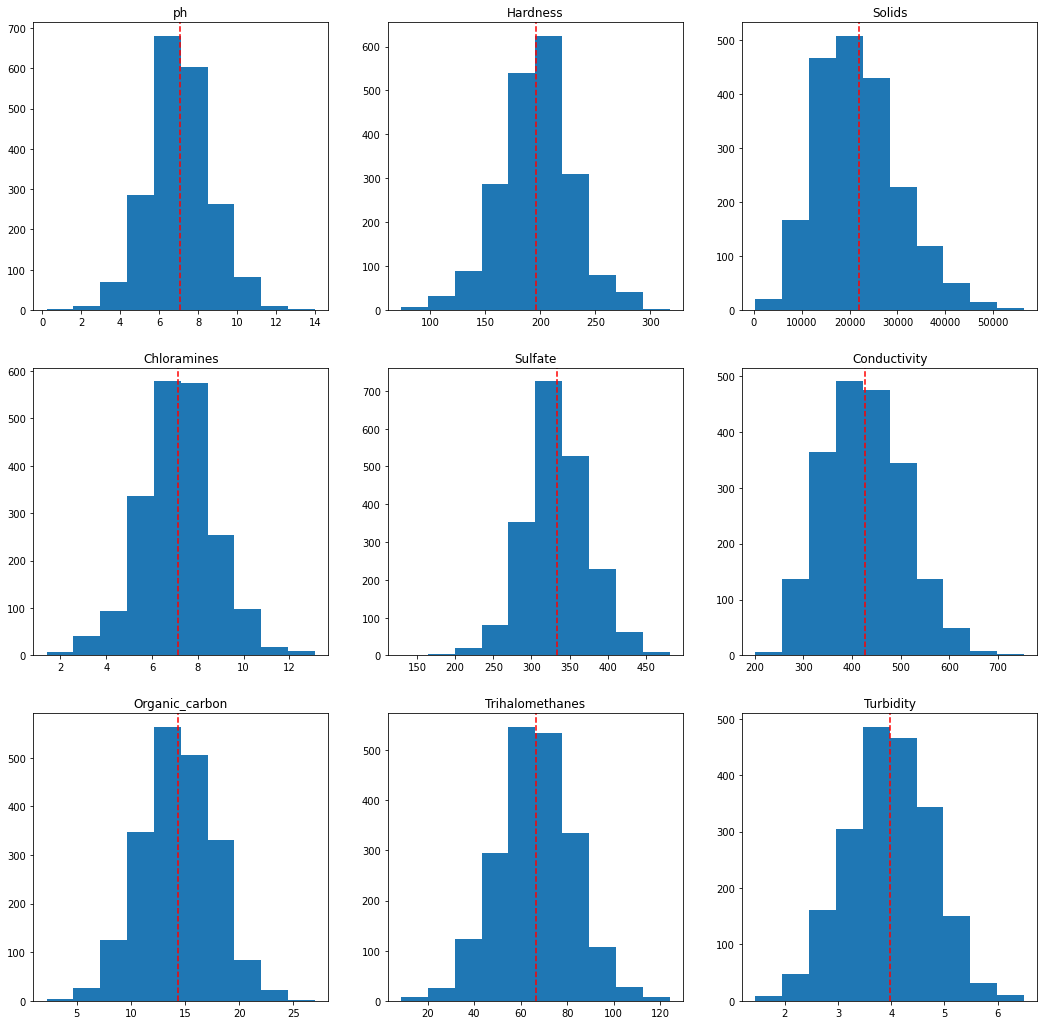

In [90]:
plt.rcParams["figure.figsize"] = (18, 18)

fig, axes = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        column = df.columns[i*3 + j]
        axes[i, j].set_title(column)
        axes[i, j].hist(df[column])
        axes[i, j].axvline(df_stats["mean"].loc[column], color="red", linestyle="--")
plt.show()

# The End